In [2]:
#Load Data
import os
os.listdir('C:/Users/Akshay/Documents/CNN Project/rockpaperscissors/rockpaperscissors')

['paper', 'README_rpc-cv-images.txt', 'rock', 'rps-cv-images', 'scissors']

In [3]:
#path to the target directory we will use
base_dir = 'C:/Users/Akshay/Documents/CNN Project/rockpaperscissors/rockpaperscissors/rps-cv-images'

In [4]:
#  assigns the path to the directory containing images of pper to the variable paper
paper = os.path.join('C:/Users/Akshay/Documents/CNN Project/rockpaperscissors/rockpaperscissors/paper')

#  assigns the path to the directory containing images of rock to the variable rock
rock = os.path.join('C:/Users/Akshay/Documents/CNN Project/rockpaperscissors/rockpaperscissors/rock')

#  assigns the path to the directory containing images of scissors to the variable scissors
scissors = os.path.join('C:/Users/Akshay/Documents/CNN Project/rockpaperscissors/rockpaperscissors/scissors')
     

In [6]:
import tensorflow as tf

In [7]:
model = tf.keras.models.Sequential([
            #first layer, an input layer with a shape of 100x150 RGB array of pictures                         
            #2D convolutional layer with 32 nodes, 3x3 filter.
          tf.keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(100,150,3)),
            #2D max-pooling layer with a size 2x2
          tf.keras.layers.MaxPooling2D(2,2),
            #second layer
          tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
            #third layer
          tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),         
            #fourth layer
          tf.keras.layers.Conv2D(256,(3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
            #flatten
          tf.keras.layers.Flatten(),
            #dense layer
          tf.keras.layers.Dense(512, activation='relu'),
          tf.keras.layers.Dense(3, activation='softmax')
])

In [8]:
#Compile the pre-built model \
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [9]:
#Training the Model
history = model.fit(
    train_gen,
    validation_data=validation_gen,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

NameError: name 'train_gen' is not defined

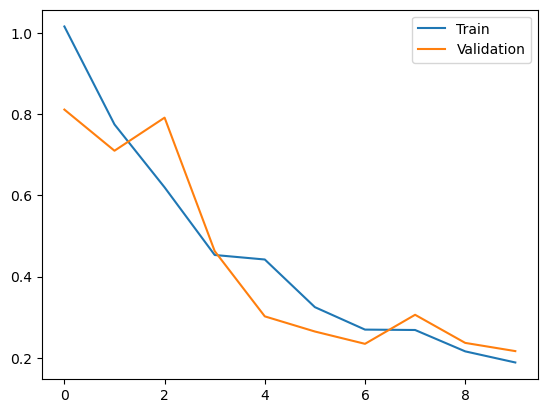

In [37]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()

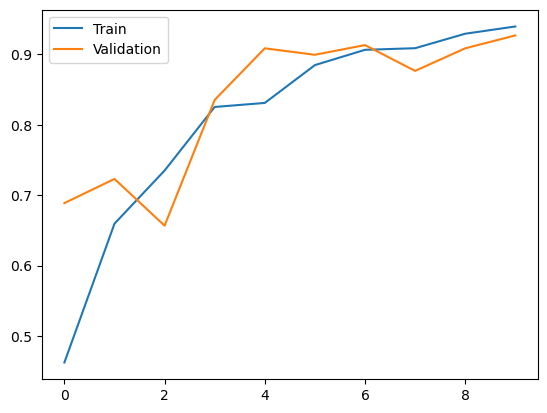

In [38]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()

In [18]:
!pip install tensorflow_datasets

In [17]:
model.save('rock_paper_scissors_model.h5')


In [1]:
import cv2
import numpy as np
from tensorflow import keras

# Load the trained CNN model
model = keras.models.load_model('rock_paper_scissors_model.h5')

# Create a dictionary to map the class indices to labels
class_labels = {0: 'Rock', 1: 'Paper', 2: 'Scissors'}

# Open a video capture object
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        break

    # Preprocess the frame (resize, convert to grayscale, normalize)
    frame = cv2.resize(frame, (150, 100))
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    normalized_frame = gray / 255.0
    reshaped_frame = np.reshape(normalized_frame, (1, 100, 150, 1))

    # Convert grayscale to RGB
    reshaped_frame_rgb = np.repeat(reshaped_frame, 3, axis=-1)

    # Make a prediction using the trained model
    predictions = model.predict(reshaped_frame_rgb)
    predicted_class = np.argmax(predictions)

    # Overlay the predicted label on the frame
    label = class_labels[predicted_class]
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)


    # Display the resulting frame
    cv2.imshow('Rock-Paper-Scissors Recognition', frame)

    # Exit if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step
